# Mini project 2

## Context
* We want to practice exploratory data analysis (EDA) on real life datasets
* We want to utilise the functions and coding best practice to derive meaningful insights

## About the dataset
* The data collected are exclusively to properties in NSW, Australia
* For the simplicity, relevancy and recency of the data, majority of the analyses were completed for the period between 01/01/2022 to 01/01/2023


## What are we trying to achieve
* We want to gather a general understanding of the data
* We want to understand if there are particular correlations between the 'Purchase price' of the property and other attributes that may impact the price

## Assumptions
* We assume that there will be strong correlations between 'Purchase price' and at least one of the attributes of the property


In [2]:
import pandas as pd

# File path and name
file_path = 'nsw-property-sales-data-updated20230524.csv'

# Read csv file into DataFrame
df = pd.read_csv(file_path)

# Print first 20 rows of DataFrame
print(df.head(20))

    Unnamed: 0  Property ID Download date / time Property name  \
0            0    3474431.0       20210412 01:00           NaN   
1            1    4206979.0       20210412 01:00           NaN   
2            2    4226730.0       20210412 01:00           NaN   
3            3       8505.0       20210412 01:00           NaN   
4            4       8690.0       20210412 01:00           NaN   
5            5       4397.0       20210412 01:00           NaN   
6            6       4587.0       20210412 01:00           NaN   
7            7       5263.0       20210412 01:00           NaN   
8            8       5290.0       20210412 01:00           NaN   
9            9       5465.0       20210412 01:00           NaN   
10          10       7720.0       20210412 01:00           NaN   
11          11       8375.0       20210412 01:00           NaN   
12          12      12020.0       20210412 01:00           NaN   
13          13      12618.0       20210412 01:00           NaN   
14        

In [3]:
# Load dataset into a pandas DataFrame
df = pd.read_csv('nsw-property-sales-data-updated20230524.csv')

# Convert "Contract date" column to datetime
df['Contract date'] = pd.to_datetime(df['Contract date'])

# Find the earliest and latest dates
earliest_date = df['Contract date'].min().strftime('%Y-%m-%d')
latest_date = df['Contract date'].max().strftime('%Y-%m-%d')

# Print the results
print("Earliest date captured:", earliest_date)
print("Latest date captured:", latest_date)


Earliest date captured: 1900-01-01
Latest date captured: 2023-05-11


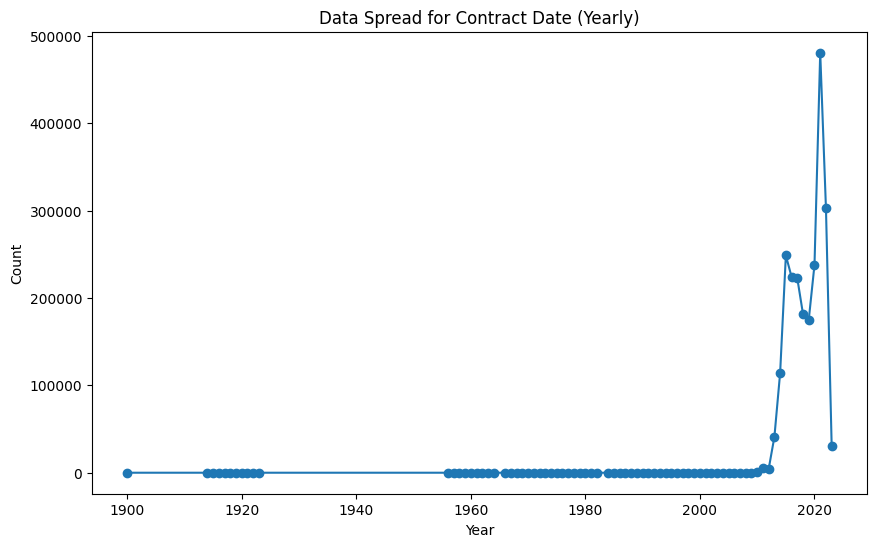

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into a pandas DataFrame
df = pd.read_csv('nsw-property-sales-data-updated20230524.csv')

# Convert "Contract date" column to datetime
df['Contract date'] = pd.to_datetime(df['Contract date'])

# Extract year from "Contract date"
df['Year'] = df['Contract date'].dt.year

# Group by year and count the number of properties
yearly_counts = df.groupby('Year')['Year'].count()

# Plot the line plot for each year
plt.figure(figsize=(10, 6))
yearly_counts.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Data Spread for Contract Date (Yearly)')
plt.show()


In [5]:
df.columns

Index(['Unnamed: 0', 'Property ID', 'Download date / time', 'Property name',
       'Property unit number', 'Property house number', 'Property street name',
       'Property locality', 'Property post code', 'Area', 'Contract date',
       'Settlement date', 'Purchase price', 'Zoning', 'Primary purpose',
       'Strata lot number', 'Year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270684 entries, 0 to 2270683
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   Property ID            float64       
 2   Download date / time   object        
 3   Property name          object        
 4   Property unit number   object        
 5   Property house number  object        
 6   Property street name   object        
 7   Property locality      object        
 8   Property post code     float64       
 9   Area                   float64       
 10  Contract date          datetime64[ns]
 11  Settlement date        object        
 12  Purchase price         int64         
 13  Zoning                 object        
 14  Primary purpose        object        
 15  Strata lot number      float64       
 16  Year                   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(9)
memory usag

In [7]:
df.shape

(2270684, 17)

In [8]:
import pandas as pd
import random

# Load dataset into a pandas DataFrame
df = pd.read_csv('nsw-property-sales-data-updated20230524.csv')

# Convert the 'Contract Date' column to datetime format
df['Contract date'] = pd.to_datetime(df['Contract date'])

# Filter the DataFrame to include only records from 2020-01-01
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-01-01')  # Assuming you want records until the end of 2020
df = df[(df['Contract date'] >= start_date) & (df['Contract date'] < end_date)]

df.shape

(1021230, 16)

In [9]:
import pandas as pd

# Load dataset into a pandas DataFrame
df = pd.read_csv('nsw-property-sales-data-updated20230524.csv')

# Convert the 'Contract Date' column to datetime format
df['Contract date'] = pd.to_datetime(df['Contract date'])

# Filter the DataFrame to include only records from 2020-01-01
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-01-01')  # Assuming you want records until the end of 2022
filtered_df = df[(df['Contract date'] >= start_date) & (df['Contract date'] < end_date)]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_properties.csv', index=False)

df = pd.read_csv('filtered_properties.csv')
df.shape

(1021230, 16)

Now that I am happy with the smaller dataset (with more relevant and recent data), I want to use a randomised sample within this to run more data analyses.

The code kept timing out with 1000 sample size, so I have reduced to 100 to see the general spread of the properties

In [10]:
import pandas as pd
import folium
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties.csv')

# Select 100 random properties
random_sample = df.sample(n=100, random_state=42)

# Create a map centered on NSW, Australia
map_nsw = folium.Map(location=[-33.8688, 151.2093], zoom_start=8)

# Initialise geocoder
geolocator = Nominatim(user_agent="property_geocoder")

# Retry decorator to handle timeout errors
def geocode_with_retry(address):
    max_retries = 3
    retry_delay = 2  # seconds
    for i in range(max_retries):
        try:
            location = geolocator.geocode(address)
            return location
        except (GeocoderTimedOut, GeocoderServiceError):
            print(f"Geocoding timed out. Retrying in {retry_delay} seconds...")
            time.sleep(retry_delay)
    return None

# Iterate over each row in the DataFrame
for _, row in random_sample.iterrows():
    # Get the property address information
    locality = row['Property locality']
    post_code = row['Property post code']
    
    # Combine address components
    address = f"{locality}, {post_code}, NSW, Australia"
    
    # Geocode the address with retry
    location = geocode_with_retry(address)
    
    # If geocoding is successful, add a marker for the property to the map
    if location is not None:
        lat = location.latitude
        lon = location.longitude
        folium.Marker(location=[lat, lon], popup='Contract date: {}'.format(row['Contract date'])).add_to(map_nsw)

# Display the map
map_nsw



In [11]:
import pandas as pd

df = pd.read_csv('filtered_properties.csv')

# Print the filtered DataFrame information
print(df.columns)
print(df.shape)


Index(['Unnamed: 0', 'Property ID', 'Download date / time', 'Property name',
       'Property unit number', 'Property house number', 'Property street name',
       'Property locality', 'Property post code', 'Area', 'Contract date',
       'Settlement date', 'Purchase price', 'Zoning', 'Primary purpose',
       'Strata lot number'],
      dtype='object')
(1021230, 16)


In [12]:
import pandas as pd

df = pd.read_csv('filtered_properties.csv')

# Keep only the desired columns
desired_columns = ['Property unit number', 'Property house number', 'Property street name',
                   'Property locality', 'Property post code', 'Area', 'Contract date',
                   'Settlement date', 'Purchase price', 'Zoning', 'Primary purpose']
df = df.loc[:, desired_columns]

# Save the updated DataFrame to a new CSV file
df.to_csv('filtered_properties2.csv', index=False)

# Print the updated DataFrame information
print(df.columns)
print(df.shape)


Index(['Property unit number', 'Property house number', 'Property street name',
       'Property locality', 'Property post code', 'Area', 'Contract date',
       'Settlement date', 'Purchase price', 'Zoning', 'Primary purpose'],
      dtype='object')
(1021230, 11)


In [13]:
df = pd.read_csv('filtered_properties2.csv')
df.head(10)

,Property unit number,Property house number,Property street name,Property locality,Property post code,Area,Contract date,Settlement date,Purchase price,Zoning,Primary purpose
0,5,195,Aberdare St,Kurri Kurri,2327.0,NaN,2021-03-11,2021-04-08,380000,NaN,Residence
1,NaN,18,Lockwood St,North Rothbury,2335.0,578.0,2021-02-22,2021-04-06,610000,R1,Residence
2,NaN,35,Harrow Cct,Greta,2334.0,2127.0,2021-03-09,2021-04-06,345000,R2,Vacant land
3,NaN,4,South Ave,Cessnock,2325.0,771.4,2021-03-10,2021-04-07,405000,B4,Residence
4,NaN,51,View St,Cessnock,2325.0,744.4,2021-02-04,2021-04-08,590000,R3,Residence
5,NaN,19,Drinan St,Branxton,2335.0,963.7,2021-03-04,2021-04-08,400000,R3,Residence
6,NaN,95,Maitland St,Branxton,2335.0,2048.7,2021-02-25,2021-04-08,650000,IN2,Commercial
7,NaN,17,Allandale Rd,Cessnock,2325.0,1277.0,2021-03-09,2021-04-08,250000,R3,Commercial
8,NaN,36,Ann St,Cessnock,2325.0,537.5,2021-02-25,2021-04-08,540000,R3,Residence
9,NaN,4,Ash St,Cessnock,2325.0,695.6,2021-02-23,2021-04-06,531500,R2,Residence


In [14]:
import pandas as pd

df = pd.read_csv('filtered_properties2.csv')

# Count the number of instances of each duplicate record
duplicate_counts = df[df.duplicated()].value_counts()

# Print the counts of duplicate records
print(duplicate_counts)

Property unit number  Property house number  Property street name  Property locality  Property post code  Area    Contract date  Settlement date  Purchase price  Zoning  Primary purpose
 C                    5 A                    Darley St             Neutral Bay        2089.0              234.7   2022-04-08     2022-07-01       2625000         R2      Residence          1
30                    2                      Oakey Creek Rd        Cessnock           2325.0              1534.0  2021-11-06     2021-12-16       993648          R2      Residence          1
                      17                     The Boulevard         Tallwoods Village  2430.0              370.2   2022-04-01     2022-04-04       550000          R1      Residence          1
                      146                    Plunkett St           Nowra              2541.0              284.3   2021-03-23     2021-04-19       522000          R3      Residence          1
3                     99                     Stant

In [15]:
df = pd.read_csv('filtered_properties2.csv')

# Count the occurrences of each duplicate record
duplicate_counts = df[df.duplicated()].groupby(df.columns.tolist()).size()

# Print the counts of duplicate records
print(duplicate_counts)

Property unit number  Property house number  Property street name  Property locality  Property post code  Area    Contract date  Settlement date  Purchase price  Zoning  Primary purpose
 C                    5 A                    Darley St             Neutral Bay        2089.0              234.7   2022-04-08     2022-07-01       2625000         R2      Residence          1
1                     1                      Ailsa Cl              East Lindfield     2070.0              1005.0  2020-12-01     2021-05-24       3025000         C4      Residence          1
                                             Bentley St            Islington          2296.0              455.2   2021-06-04     2021-07-30       860000          IN2     Residence          1
                                             Cootamundra Bvd       Gobbagombalin      2650.0              428.8   2021-03-04     2021-04-01       368000          R1      Residence          1
                                             Miche

# False scare. There actually seems to be no duplicate records, so we will proceed for further analyses.

# Property Prices

In [16]:
# Question 1: Overall distribution of property prices

import pandas as pd
import numpy as np

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties2.csv')

# Extract the purchase price column as a numpy array
purchase_prices = df['Purchase price'].to_numpy()

# Calculate the minimum, maximum, and overall spread of purchase prices
min_price = np.min(purchase_prices)
max_price = np.max(purchase_prices)
spread = np.ptp(purchase_prices)

# Print the statistics
print(f"Minimum Price: {min_price} AUD")
print(f"Maximum Price: {max_price} AUD")


Minimum Price: 100 AUD
Maximum Price: 850000000 AUD


In [17]:
import pandas as pd

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties2.csv')

# Calculate the mode and median of the purchase prices
mode_price = df['Purchase price'].mode().values
median_price = df['Purchase price'].median()

# Print the statistics
print(f"Mode Price: {mode_price} AUD")
print(f"Median Price: {median_price} AUD")


Mode Price: [650000] AUD
Median Price: 752000.0 AUD


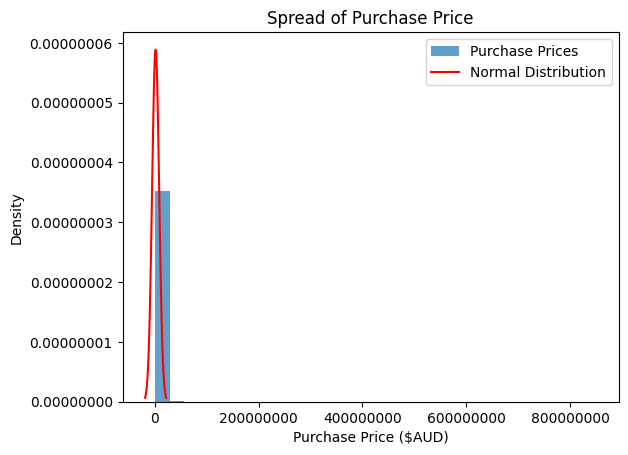

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties2.csv')

# Extract the purchase price column as a numpy array
purchase_prices = df['Purchase price'].to_numpy()

# Calculate mean and standard deviation of purchase prices
mean = np.mean(purchase_prices)
std = np.std(purchase_prices)

# Create a normal distribution object
dist = stats.norm(loc=mean, scale=std)

# Generate a range of values for the x-axis
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)

# Plot the histogram of purchase prices
plt.hist(purchase_prices, bins=30, density=True, alpha=0.7, label='Purchase Prices')

# Plot the fitted normal distribution line
plt.plot(x, dist.pdf(x), 'r-', label='Normal Distribution')

# Set labels and title
plt.xlabel('Purchase Price ($AUD)')
plt.ylabel('Density')
plt.title('Spread of Purchase Price')

plt.ticklabel_format(style='plain')

# Display the legend
plt.legend()

# Display the plot
plt.show()

In [19]:
import pandas as pd

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties2.csv')

# Extract the purchase price column
purchase_prices = df['Purchase price']

# Calculate the IQR (Interquartile Range)
Q1 = purchase_prices.quantile(0.25)
Q3 = purchase_prices.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[(purchase_prices >= lower_bound) & (purchase_prices <= upper_bound)]

# Print the shape of the filtered DataFrame
print(filtered_df.shape)


(930540, 11)


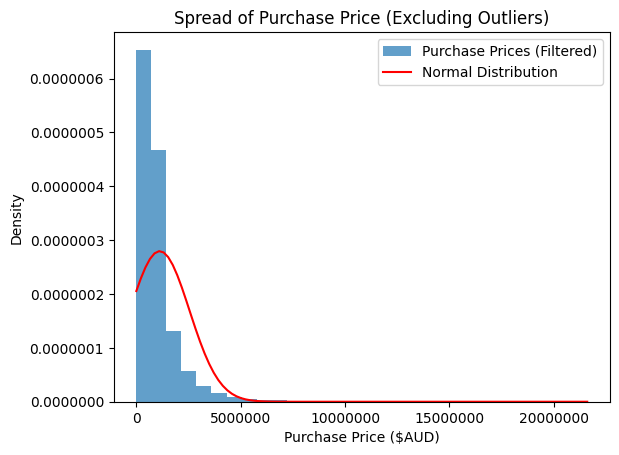

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties2.csv')

# Extract the purchase price column as a numpy array
purchase_prices = df['Purchase price'].to_numpy()

# Calculate the mean and standard deviation of purchase prices
mean = np.mean(purchase_prices)
std = np.std(purchase_prices)

# Define the z-score threshold for outliers
z_score_threshold = 3

# Filter out the outliers using z-score
filtered_prices = purchase_prices[(np.abs(stats.zscore(purchase_prices)) < z_score_threshold)]

# Create a normal distribution object using filtered prices
dist = stats.norm(loc=np.mean(filtered_prices), scale=np.std(filtered_prices))

# Generate a range of values for the x-axis
x = np.linspace(np.min(filtered_prices), np.max(filtered_prices), 100)

# Plot the histogram of filtered purchase prices
plt.hist(filtered_prices, bins=30, density=True, alpha=0.7, label='Purchase Prices (Filtered)')

# Plot the fitted normal distribution line
plt.plot(x, dist.pdf(x), 'r-', label='Normal Distribution')

# Set labels and title
plt.xlabel('Purchase Price ($AUD)')
plt.ylabel('Density')
plt.title('Spread of Purchase Price (Excluding Outliers)')

# Display the legend
plt.legend()

plt.ticklabel_format(style='plain')


# Display the plot
plt.show()

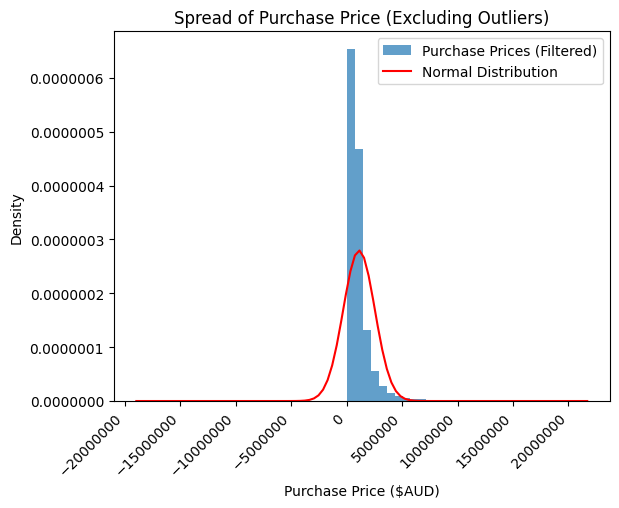

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties2.csv')

# Extract the purchase price column as a numpy array
purchase_prices = df['Purchase price'].to_numpy()

# Calculate the mean and standard deviation of purchase prices
mean = np.mean(purchase_prices)
std = np.std(purchase_prices)

# Define the z-score threshold for outliers
z_score_threshold = 3

# Filter out the outliers using z-score
filtered_prices = purchase_prices[(np.abs(stats.zscore(purchase_prices)) < z_score_threshold)]

# Calculate the new range of values for the x-axis
range_min = mean - 3 * std
range_max = mean + 3 * std
x = np.linspace(range_min, range_max, 100)

# Create a normal distribution object using filtered prices
dist = stats.norm(loc=np.mean(filtered_prices), scale=np.std(filtered_prices))

# Plot the histogram of filtered purchase prices
plt.hist(filtered_prices, bins=30, density=True, alpha=0.7, label='Purchase Prices (Filtered)')

# Plot the fitted normal distribution line
plt.plot(x, dist.pdf(x), 'r-', label='Normal Distribution')

# Set labels and title
plt.xlabel('Purchase Price ($AUD)')
plt.ylabel('Density')
plt.title('Spread of Purchase Price (Excluding Outliers)')

# Disable scientific notation on the axes
plt.ticklabel_format(style='plain')

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend()

# Display the plot
plt.show()


In [22]:
df = pd.read_csv('filtered_properties2.csv')

# Extract the purchase price column as a numpy array
purchase_prices = df['Purchase price'].to_numpy()

# Calculate the mean and standard deviation of purchase prices
mean = np.mean(purchase_prices)
std = np.std(purchase_prices)

# Define the z-score threshold for outliers
z_score_threshold = 3

# Filter out the outliers using z-score
filtered_prices = purchase_prices[(np.abs(stats.zscore(purchase_prices)) < z_score_threshold)]

# Update the DataFrame to include only the filtered prices
df_filtered = df[(np.abs(stats.zscore(df['Purchase price'])) < z_score_threshold)]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('filtered_properties3.csv', index=False)


# Purchase price in popular suburbs

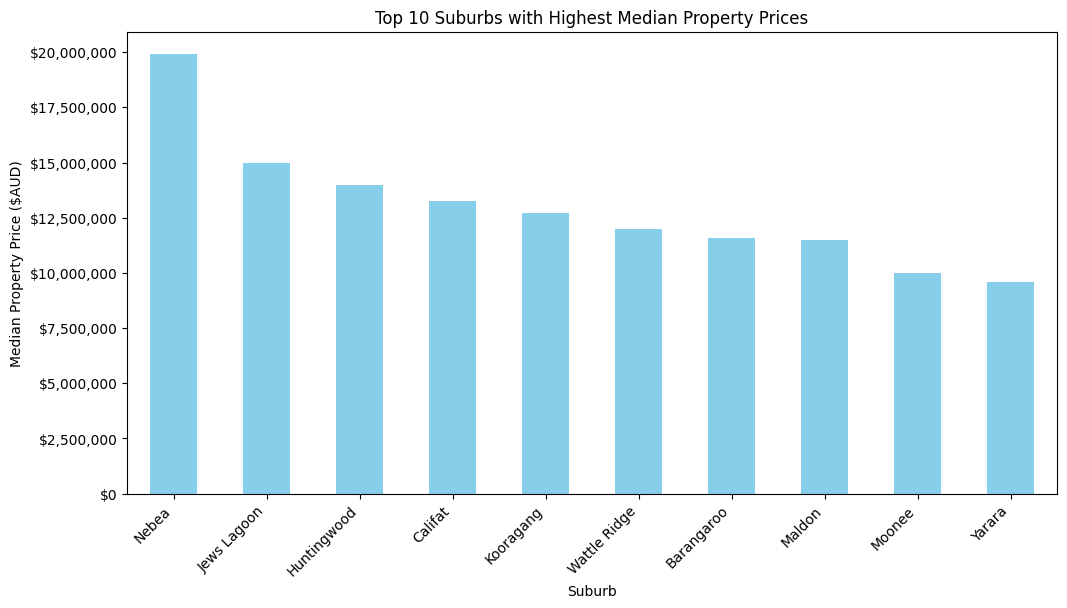

In [23]:
# Question 2: Property prices across different suburbs

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties3.csv')

suburb_prices = df.groupby('Property locality')['Purchase price'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
suburb_prices.plot(kind='bar', color='skyblue')

plt.xlabel('Suburb')
plt.ylabel('Median Property Price ($AUD)')
plt.title('Top 10 Suburbs with Highest Median Property Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis labels to display full dollar sign
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Property size in popular suburbs

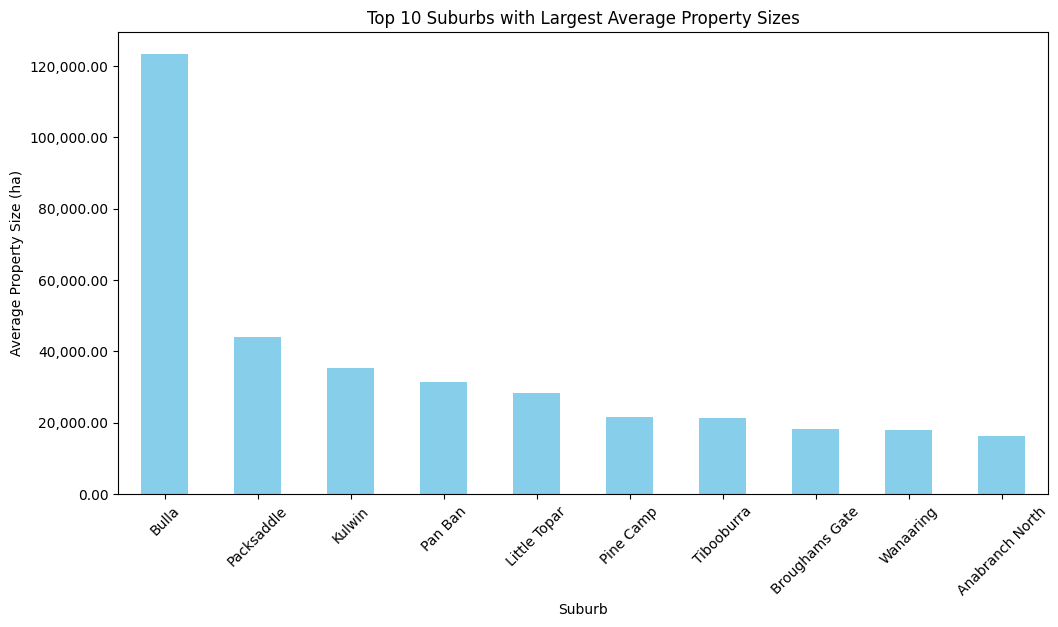

In [24]:
# Question 3: Average property size across suburbs

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties3.csv')

suburb_sizes = df.groupby('Property locality')['Area'].mean().sort_values(ascending=False).head(10)
suburb_sizes_hectares = suburb_sizes / 10000  # Convert from square meters to hectares

if not suburb_sizes.empty:
    plt.figure(figsize=(12, 6))
    suburb_sizes_hectares.plot(kind='bar', color='skyblue')
    plt.xlabel('Suburb')
    plt.ylabel('Average Property Size (ha)')
    plt.title('Top 10 Suburbs with Largest Average Property Sizes')
    plt.xticks(rotation=45)

    # Format y-axis labels to remove the dollar sign
    formatter = ticker.StrMethodFormatter('{x:,.2f}')
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.show()
else:
    print('No data available for analysis.')



# Property size spread

<ipython-input-25-440862aafe46>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool')


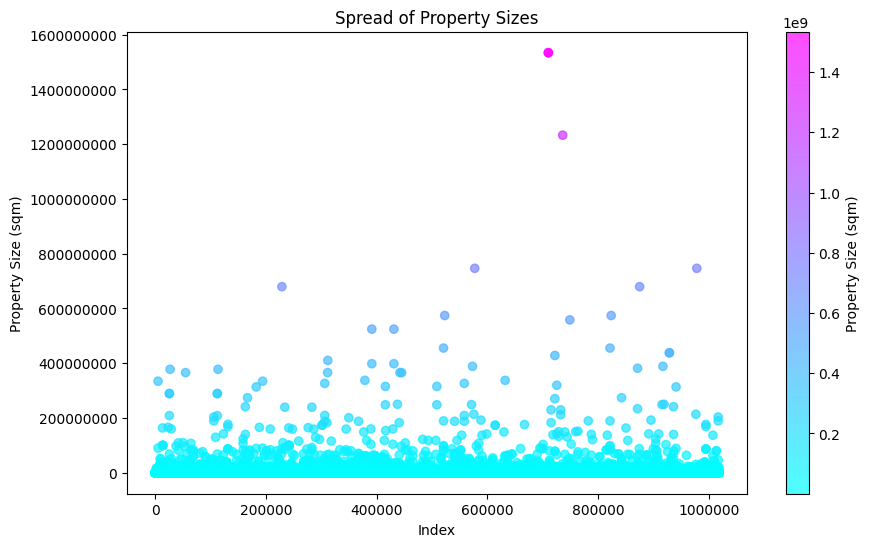

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties3.csv')

# Define colormap
cmap = cm.get_cmap('cool')

# Plot the scatter plot with color density
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Area'], c=df['Area'], cmap=cmap, alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Property Size (sqm)')
plt.title('Spread of Property Sizes')
plt.colorbar(label='Property Size (sqm)')

# Disable scientific notation on the axes
plt.ticklabel_format(style='plain', useOffset=False)

plt.show()

<ipython-input-26-897e723db154>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool')


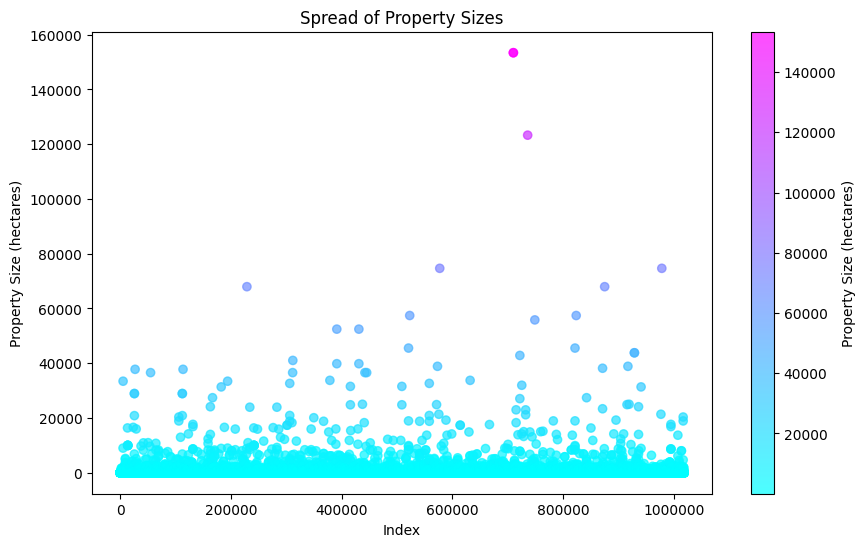

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties3.csv')

# Convert property size from square meters to hectares
df['Area'] = df['Area'] / 10000

# Define colormap
cmap = cm.get_cmap('cool')

# Plot the scatter plot with color density
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Area'], c=df['Area'], cmap=cmap, alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Property Size (hectares)')
plt.title('Spread of Property Sizes')
plt.colorbar(label='Property Size (hectares)')

# Disable scientific notation on the axes
plt.ticklabel_format(style='plain', useOffset=False)

plt.show()

<ipython-input-27-e1fe3204ed2e>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool')


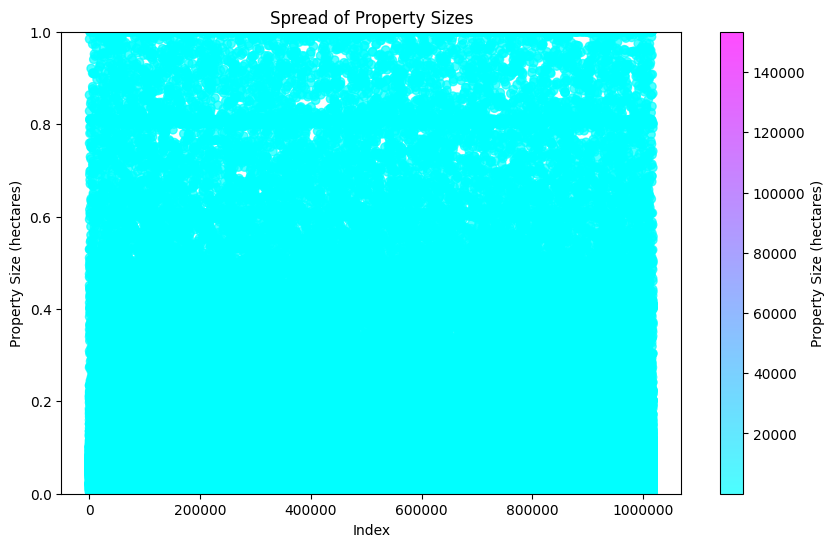

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load dataset into a pandas DataFrame
df = pd.read_csv('filtered_properties3.csv')

# Convert property size from square meters to hectares
df['Area'] = df['Area'] / 10000

# Define colormap
cmap = cm.get_cmap('cool')

# Plot the scatter plot with color density
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Area'], c=df['Area'], cmap=cmap, alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Property Size (hectares)')
plt.title('Spread of Property Sizes')
plt.colorbar(label='Property Size (hectares)')

# Set y-axis limits to show up to 1 hectare
plt.ylim(0, 1)

# Disable scientific notation on the axes
plt.ticklabel_format(style='plain', useOffset=False)

plt.show()

# Time it takes between contract date vs settlement

In [28]:
# Load updated dataset
df = pd.read_csv('filtered_properties3.csv')

# Convert 'Contract date' and 'Settlement date' columns to datetime format
df['Contract date'] = pd.to_datetime(df['Contract date'])
df['Settlement date'] = pd.to_datetime(df['Settlement date'])

# Calculate duration between contract exchange and settlement in days
df['Duration'] = (df['Settlement date'] - df['Contract date']).dt.days

# Calculate average duration
average_duration = df['Duration'].mean()

print(f"The average duration between contract exchange and settlement is approximately {average_duration:.2f} days.")


The average duration between contract exchange and settlement is approximately 74.34 days.


# Property types

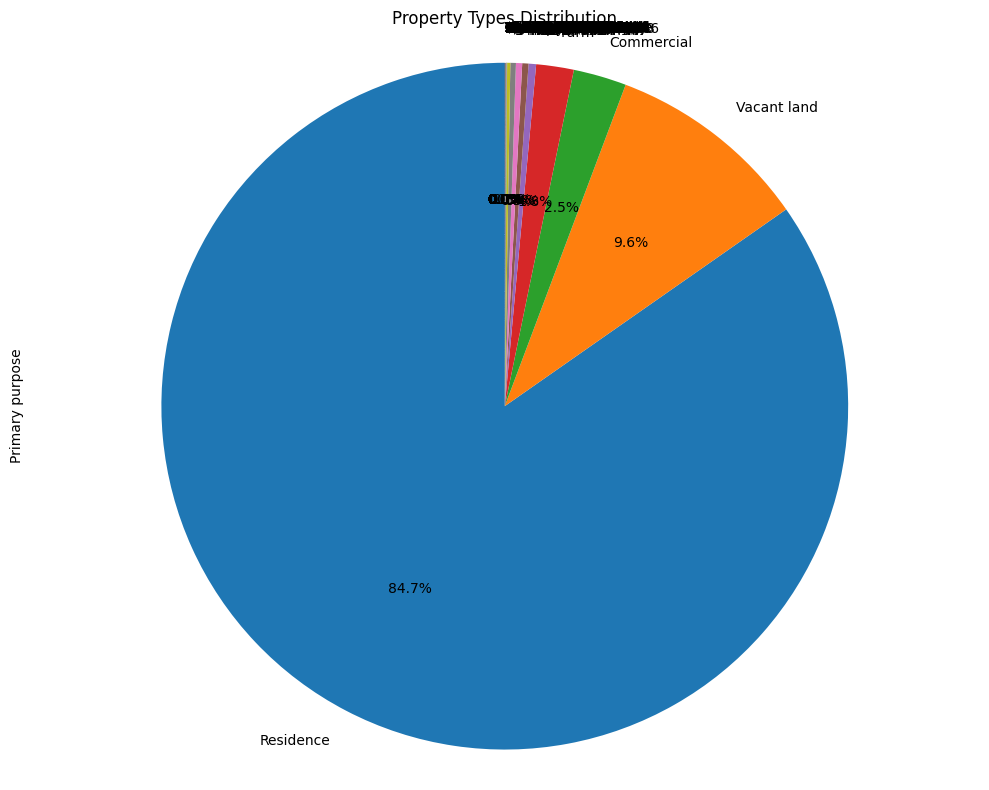

In [29]:
# Question 6: Property types

# Load updated dataset
df = pd.read_csv('filtered_properties3.csv')

property_types = df['Primary purpose'].value_counts()

plt.figure(figsize=(10, 8))
property_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Property Types Distribution')

# Adjust subplot parameters to prevent label overlap
plt.tight_layout()

plt.show()


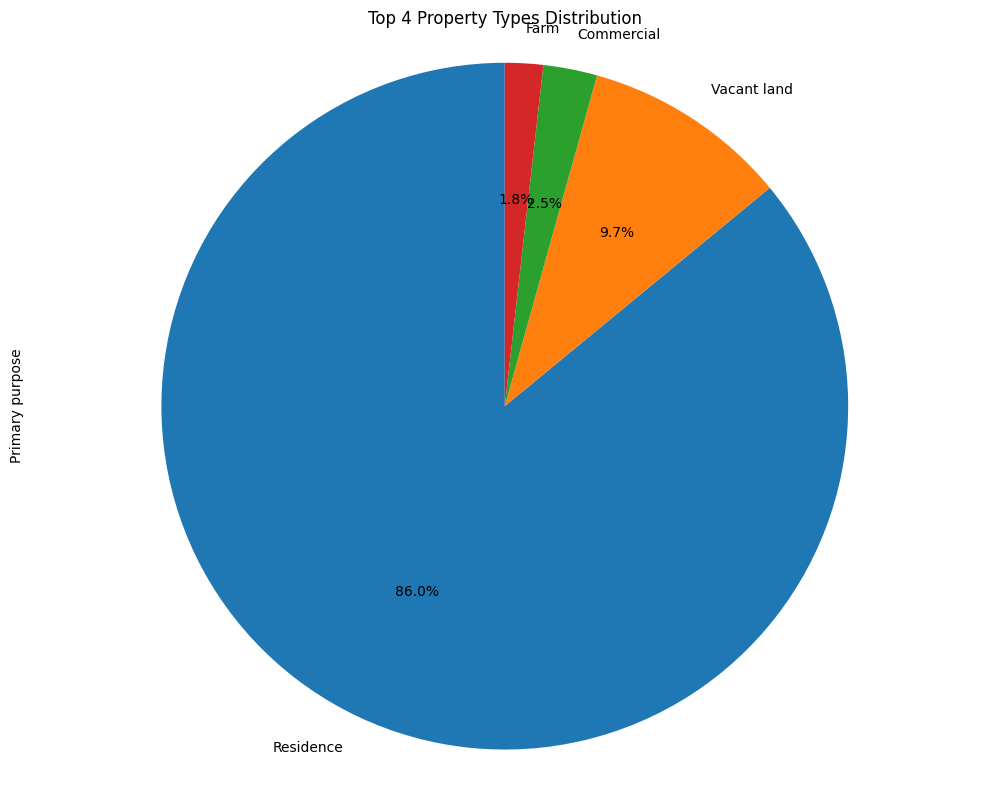

In [30]:
# Load updated dataset
df = pd.read_csv('filtered_properties3.csv')

property_types = df['Primary purpose'].value_counts().head(4)

plt.figure(figsize=(10, 8))
property_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 4 Property Types Distribution')

# Adjust subplot parameters to prevent label overlap
plt.tight_layout()

plt.show()

In [31]:
# Load updated dataset
df = pd.read_csv('filtered_properties3.csv')

# Filter the DataFrame to include only 'Residence' property types
df = df[df['Primary purpose'] == 'Residence']

# Save the updated dataset to a new CSV file
df.to_csv('filtered_properties_residence.csv', index=False)

In [32]:
# Load the updated dataset with 'Residence' property types
df_residence = pd.read_csv('filtered_properties_residence.csv')

# Count the number of records
record_count = df_residence.shape[0]

# Print the count
print("Number of records with 'Residence' property type:", record_count)

Number of records with 'Residence' property type: 862195


# Further reduced the records down to 862195 (initial start was 2270684)

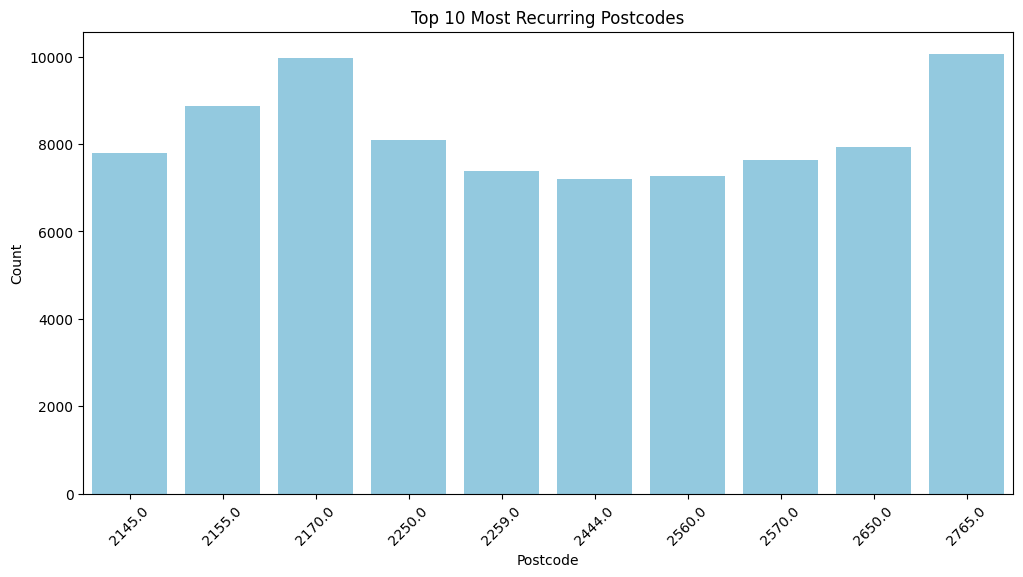

In [33]:
import seaborn as sns

# Load the updated dataset with 'Residence' property types
df_residence = pd.read_csv('filtered_properties_residence.csv')

# Get count of each postcode
postcode_counts = df['Property post code'].value_counts().head(10)

# Plot most recurring postcodes
plt.figure(figsize=(12, 6))
sns.barplot(x=postcode_counts.index, y=postcode_counts.values, color='skyblue')
plt.xlabel('Postcode')
plt.ylabel('Count')
plt.title('Top 10 Most Recurring Postcodes')
plt.xticks(rotation=45)
plt.show()

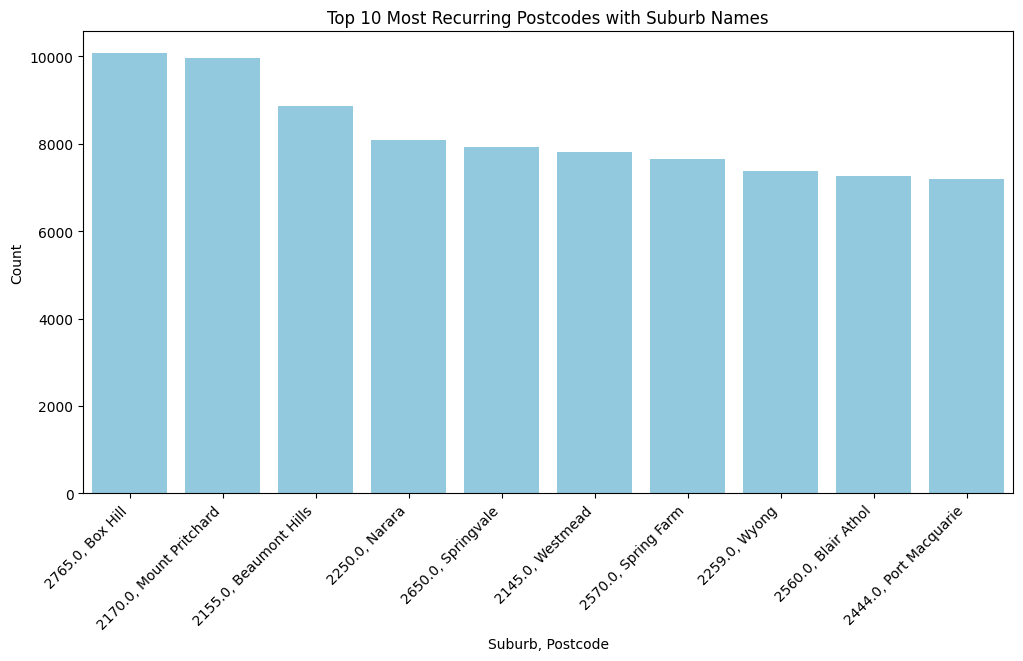

In [34]:
# Load the updated dataset with 'Residence' property types
df_residence = pd.read_csv('filtered_properties_residence.csv')

# Merge postcode with suburb name
postcode_suburb = df.groupby('Property post code')['Property locality'].first()
postcode_suburb = postcode_suburb.loc[postcode_counts.index]

# Convert postcode to string and plot the most recurring postcodes with suburb names
plt.figure(figsize=(12, 6))
sns.barplot(x=postcode_suburb.index.astype(str) + ', ' + postcode_suburb.values, y=postcode_counts.values, color='skyblue')
plt.xlabel('Suburb, Postcode')
plt.ylabel('Count')
plt.title('Top 10 Most Recurring Postcodes with Suburb Names')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-35-53f6a063b26e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suburb['Contract date'] = pd.to_datetime(df_suburb['Contract date'])


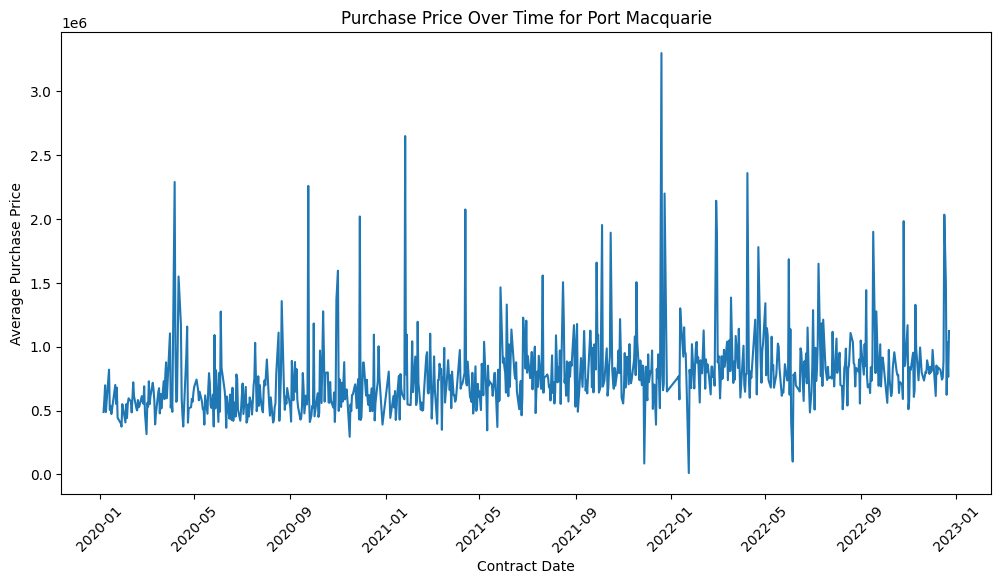

<ipython-input-35-53f6a063b26e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suburb['Contract date'] = pd.to_datetime(df_suburb['Contract date'])


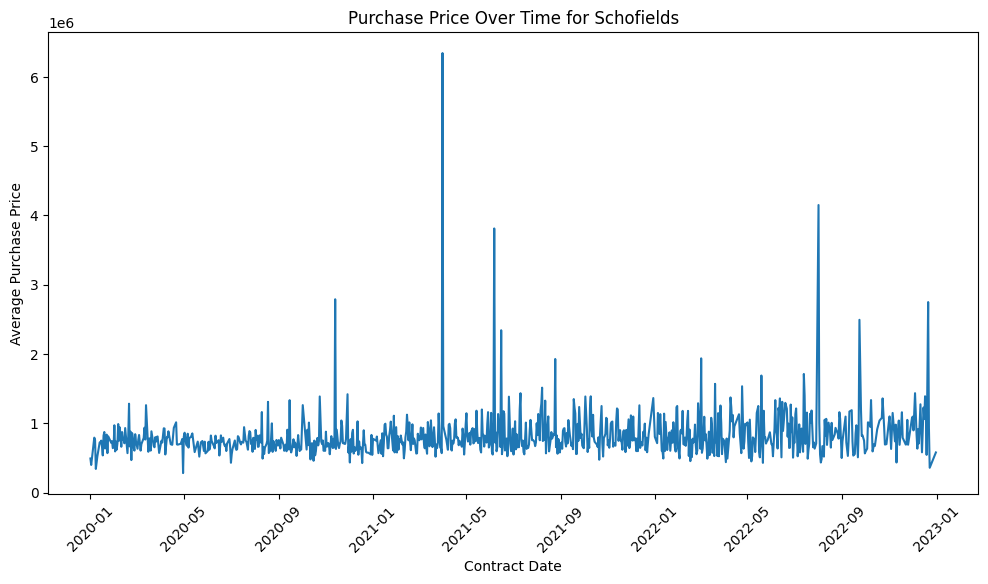

<ipython-input-35-53f6a063b26e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suburb['Contract date'] = pd.to_datetime(df_suburb['Contract date'])


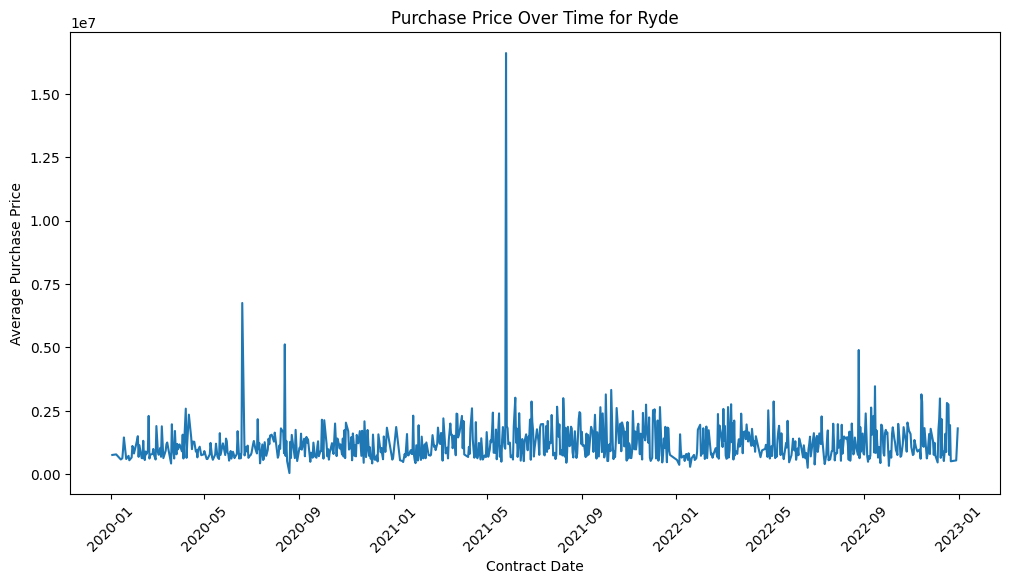

<ipython-input-35-53f6a063b26e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suburb['Contract date'] = pd.to_datetime(df_suburb['Contract date'])


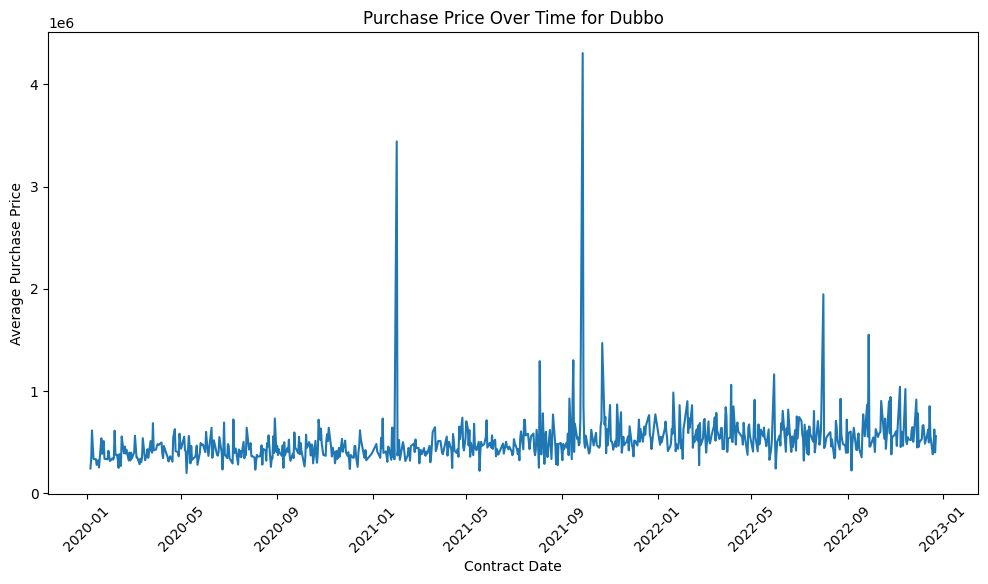

<ipython-input-35-53f6a063b26e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suburb['Contract date'] = pd.to_datetime(df_suburb['Contract date'])


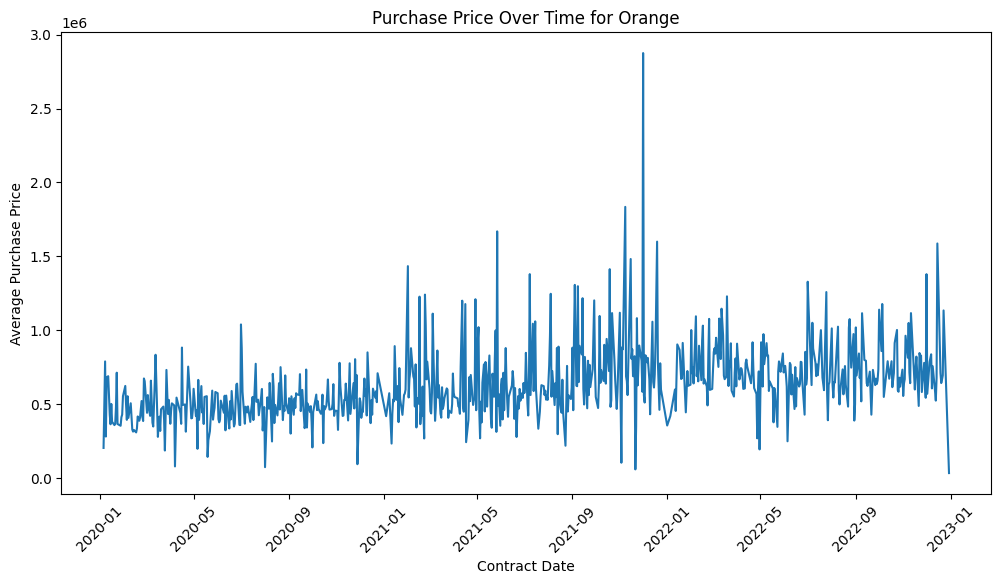

In [35]:
# Load the updated dataset with 'Residence' property types
df = pd.read_csv('filtered_properties_residence.csv')

# Filter the dataset to include only the top 5 suburbs based on the number of properties
top_suburbs = df['Property locality'].value_counts().head(5).index

# Iterate over each suburb and create a separate graph
for suburb in top_suburbs:
    # Filter the data for the current suburb
    df_suburb = df[df['Property locality'] == suburb]

    # Convert the 'Contract date' column to datetime format
    df_suburb['Contract date'] = pd.to_datetime(df_suburb['Contract date'])

    # Group the data by contract date and calculate the average purchase price
    grouped_data = df_suburb.groupby('Contract date')['Purchase price'].mean().reset_index()

    # Create a new figure and plot the data
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(grouped_data['Contract date'], grouped_data['Purchase price'])
    ax.set_xlabel('Contract Date')
    ax.set_ylabel('Average Purchase Price')
    ax.set_title(f'Purchase Price Over Time for {suburb}')
    plt.xticks(rotation=45)
    plt.show()

In [36]:
# Load the updated dataset with 'Residence' property types
df = pd.read_csv('filtered_properties_residence.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                    Property post code      Area  Purchase price
Property post code            1.000000  0.011589       -0.290152
Area                          0.011589  1.000000        0.025038
Purchase price               -0.290152  0.025038        1.000000


<ipython-input-36-2c9fb9edcda2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<ipython-input-37-7c0481cf3ddb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


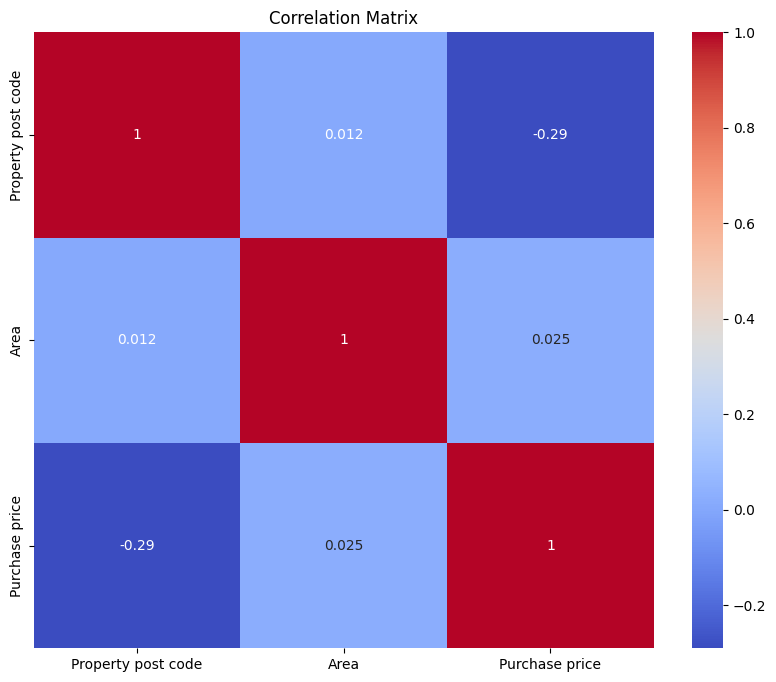

In [37]:
# Load the updated dataset with 'Residence' property types
df = pd.read_csv('filtered_properties_residence.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [40]:
# Load the updated dataset with 'Residence' property types
df = pd.read_csv('filtered_properties_residence.csv')

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract the correlation coefficient between 'Purchase price' and 'Area'
corr_coefficient = corr_matrix.loc['Purchase price', 'Area']

print(f"The correlation coefficient between 'Purchase price' and 'Area' is: {corr_coefficient}")

The correlation coefficient between 'Purchase price' and 'Area' is: 0.02503778533364447


In [39]:
# Load the updated dataset with 'Residence' property types
df = pd.read_csv('filtered_properties_residence.csv')

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Find the attribute with the highest correlation with the target attribute
target_attribute = 'Purchase price'
highest_corr_attribute = corr_matrix[target_attribute].drop(target_attribute).idxmax()

print(f"The attribute with the highest correlation with '{target_attribute}' is '{highest_corr_attribute}'")

The attribute with the highest correlation with 'Purchase price' is 'Area'


Based on the analysis, despite the correlation coefficient between 'Purchase price' and 'Area' being a positive value of 0.03, this indicates a weak positive relationship. 

As a general rule, this was deduced by assuming that correlation coefficients range from -1 to 1, where values close to -1 or 1 indicate a strong correlation, and values close to 0 indicate a weak correlation.

With this result, it is suggested that while there is a slight tendency for properties with larger areas to have slightly higher purchase prices, the correlation coefficient of 0.03 signifies a relatively weak association, suggesting that 'Area' alone may not be a strong determinant of property prices. Further investigation of additional factors will be needed to gain a more comprehensive understanding of the influences on property prices.